# MHKiT Wave Module 
The following example runs an application of the [MHKiT wave module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html) to 1) read in NDBC data, 2) compute metrics from spectral data, 3) generate a capture length matrix, 4) calculate MAEP, and 5) plot the matrices.

Start by importing the necessary python packages and MHKiT module.

In [1]:
import numpy as np
import pandas as pd
from mhkit import wave

## Load NDBC Data 

We can use MHKiT to load data downloaded from https://www.ndbc.noaa.gov. 


In [2]:
ndbc_data_file = "data/wave/data.txt"

# ndbc.read_file outputs the NDBC file data into two variables.
# raw_ndbc_data is a pandas DataFrame containing the file data.
# meta contains the meta data, if available.
[raw_ndbc_data, meta] = wave.io.ndbc.read_file(ndbc_data_file)
raw_ndbc_data.head()

c:\users\akeeste\documents\software\github\mhkit-python\mhkit\wave\io\ndbc.py:99: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(


,0.0200,0.0325,0.0375,0.0425,0.0475,0.0525,0.0575,0.0625,0.0675,0.0725,...,0.3300,0.3400,0.3500,0.3650,0.3850,0.4050,0.4250,0.4450,0.4650,0.4850
2018-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.03,0.04,0.09,0.22,0.22,...,0.07,0.08,0.07,0.07,0.03,0.01,0.02,0.01,0.01,0.0
2018-01-01 01:40:00,0.0,0.0,0.0,0.0,0.0,0.02,0.06,0.08,0.21,0.21,...,0.07,0.07,0.08,0.02,0.01,0.02,0.01,0.01,0.00,0.0
2018-01-01 02:40:00,0.0,0.0,0.0,0.0,0.0,0.00,0.08,0.07,0.14,0.32,...,0.08,0.06,0.05,0.03,0.03,0.02,0.01,0.01,0.00,0.0
2018-01-01 03:40:00,0.0,0.0,0.0,0.0,0.0,0.00,0.13,0.22,0.26,0.32,...,0.05,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.0
2018-01-01 04:40:00,0.0,0.0,0.0,0.0,0.0,0.03,0.14,0.17,0.37,0.40,...,0.06,0.12,0.04,0.04,0.02,0.01,0.01,0.01,0.01,0.0


The resulting DataFrame is spectra indexed (rows) by datetime with frequency as the columns. To use this data in MHKiT functions we must first transpose the DataFrame

In [3]:
# Transpose raw NDBC data
ndbc_data = raw_ndbc_data.T
ndbc_data.head()

,2018-01-01 00:40:00,2018-01-01 01:40:00,2018-01-01 02:40:00,2018-01-01 03:40:00,2018-01-01 04:40:00,2018-01-01 05:40:00,2018-01-01 06:40:00,2018-01-01 07:40:00,2018-01-01 08:40:00,2018-01-01 09:40:00,...,2018-01-31 14:40:00,2018-01-31 15:40:00,2018-01-31 16:40:00,2018-01-31 17:40:00,2018-01-31 18:40:00,2018-01-31 19:40:00,2018-01-31 20:40:00,2018-01-31 21:40:00,2018-01-31 22:40:00,2018-01-31 23:40:00
0.0200,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.0325,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.0375,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.0425,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0.0475,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.06,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0


## Compute Wave Metrics 
We will now use MHKiT to compute the significant wave height, energy period, and energy flux. 

In [4]:
# Compute the enegy periods from the NDBC spectra data
Te = wave.resource.energy_period(ndbc_data)
Te.head()

,Te
index,
2018-01-01 00:40:00,7.458731
2018-01-01 01:40:00,7.682413
2018-01-01 02:40:00,7.498263
2018-01-01 03:40:00,7.676198
2018-01-01 04:40:00,7.669476


In [5]:
# Compute the significant wave height from the NDBC spectra data
Hm0 = wave.resource.significant_wave_height(ndbc_data)
Hm0.head()

,Hm0
index,
2018-01-01 00:40:00,0.939574
2018-01-01 01:40:00,1.001399
2018-01-01 02:40:00,0.924770
2018-01-01 03:40:00,0.962497
2018-01-01 04:40:00,0.989949


In [6]:
# Set water depth to 60 m
h = 60

# Compute the energy flux  from the NDBC spectra data and water depth
J = wave.resource.energy_flux(ndbc_data, h)
J.head()

,J
index,
2018-01-01 00:40:00,3354.825613
2018-01-01 01:40:00,3916.541523
2018-01-01 02:40:00,3278.298930
2018-01-01 03:40:00,3664.246679
2018-01-01 04:40:00,3867.014933


### Conversion from DataFrames to Series
MHKiT functions typically take in Pandas Series so that the function knows exactly which column to use. Pandas Series are one-dimensional ndarrays with axis labels which are most commonly encountered when a single column is requested from a DataFrame (e.g. `ndbc_data['2018-01-01 01:40:00']` returns a Pandas Series from the Pandas DataFrame of all frequencies at the specified time). 

To the above results (energy Period, energy flux, and significant wave height) were returned as DataFrames. For DataFrames which only have one column the conversion from DataFrame to Series can accomplished using the `squeeze` method. Alternatively we can call on the column header. Both methods are demonstrated below:

In [7]:
# Convert the energy period DataFrame to a Series.
Te = Te.squeeze()
Te.head()

index
2018-01-01 00:40:00    7.458731
2018-01-01 01:40:00    7.682413
2018-01-01 02:40:00    7.498263
2018-01-01 03:40:00    7.676198
2018-01-01 04:40:00    7.669476
Name: Te, dtype: float64

In [8]:
# Alternatively, convert to Series by calling a specific column in the DataFrame
Hm0 = Hm0["Hm0"]
print(Hm0)

J = J["J"]
print(J)

index
2018-01-01 00:40:00    0.939574
2018-01-01 01:40:00    1.001399
2018-01-01 02:40:00    0.924770
2018-01-01 03:40:00    0.962497
2018-01-01 04:40:00    0.989949
                         ...   
2018-01-31 19:40:00    2.650811
2018-01-31 20:40:00    3.086746
2018-01-31 21:40:00    2.650358
2018-01-31 22:40:00    2.941428
2018-01-31 23:40:00    2.895928
Name: Hm0, Length: 743, dtype: float64
index
2018-01-01 00:40:00     3354.825613
2018-01-01 01:40:00     3916.541523
2018-01-01 02:40:00     3278.298930
2018-01-01 03:40:00     3664.246679
2018-01-01 04:40:00     3867.014933
                           ...     
2018-01-31 19:40:00    37596.750775
2018-01-31 20:40:00    52532.427635
2018-01-31 21:40:00    38153.227517
2018-01-31 22:40:00    50501.872907
2018-01-31 23:40:00    47070.874952
Name: J, Length: 743, dtype: float64


## Generate Random Power Data

For demonstration purposes, this example uses synthetic power data generated from statistical distributions.  In a real application, the user would provide power values from a WEC.  The data is stored in pandas Series, containing 743 points. 

In [9]:
# Set the random seed, to reproduce results
np.random.seed(1)
# Generate random power values
P = pd.Series(np.random.normal(200, 40, 743), index=J.index)

## Capture Length Matrices

The following operations create capture length matrices, as specified by the IEC/TS 62600-100.  But first, we need to calculate capture length and define bin centers.  The mean capture length matrix is printed below.  Keep in mind that this data has been artificially generated, so it may not be representative of what a real-world scatter diagram would look like.

In [10]:
# Calculate capture length
L = wave.performance.capture_length(P, J)

# Generate bins for Hm0 and Te, input format (start, stop, step_size)
Hm0_bins = np.arange(0, Hm0.values.max() + 0.5, 0.5)
Te_bins = np.arange(0, Te.values.max() + 1, 1)

# Create capture length matrices using mean, standard deviation, count, min and max statistics
LM_mean = wave.performance.capture_length_matrix(Hm0, Te, L, "mean", Hm0_bins, Te_bins)
LM_std = wave.performance.capture_length_matrix(Hm0, Te, L, "std", Hm0_bins, Te_bins)
LM_count = wave.performance.capture_length_matrix(
    Hm0, Te, L, "count", Hm0_bins, Te_bins
)
LM_min = wave.performance.capture_length_matrix(Hm0, Te, L, "min", Hm0_bins, Te_bins)
LM_max = wave.performance.capture_length_matrix(Hm0, Te, L, "max", Hm0_bins, Te_bins)

# Show mean capture length matrix
LM_mean

y_centers,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
x_centers,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120286,0.053376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.110686,0.068070,0.049452,0.065912,NaN,0.056593,0.029950,0.017234,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019749,0.018673,NaN,NaN,0.012473,0.011205,0.012307,0.010432,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013882,0.012547,0.009672,0.008770,0.008585,0.007525,0.005272,0.007809,NaN,NaN
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007244,0.006488,0.005788,0.005652,0.005180,0.004260,0.003623,0.004509,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004500,0.005660,0.004691,0.004109,0.003952,0.003104,0.003408,0.002291,0.001792,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003924,0.003674,0.003020,0.002746,0.002247,0.002000,0.002257,0.002033,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003185,0.002513,0.002386,0.002147,0.002246,0.001605,0.001730,NaN,NaN


Additional capture length matrices can be computed, for example, the frequency matrix is computed below.

In [11]:
# Create capture length matrices using frequency
LM_freq = wave.performance.capture_length_matrix(
    Hm0, Te, L, "frequency", Hm0_bins, Te_bins
)

# Show capture length matrix using frequency
LM_freq

y_centers,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
x_centers,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002692,0.001346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001346,0.006729,0.004038,0.001346,0.000000,0.002692,0.002692,0.001346,0.000000,0.000000,0.000000
1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.005384,0.002692,0.000000,0.000000,0.009421,0.004038,0.006729,0.005384,0.000000,0.000000
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002692,0.005384,0.018843,0.018843,0.029610,0.021534,0.001346,0.002692,0.000000,0.000000
2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.013459,0.052490,0.055182,0.018843,0.025572,0.022880,0.005384,0.001346,0.000000
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001346,0.021534,0.044415,0.047106,0.020188,0.012113,0.010767,0.010767,0.001346,0.000000
3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006729,0.040377,0.029610,0.047106,0.004038,0.008075,0.004038,0.001346,0.000000
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.009421,0.017497,0.029610,0.040377,0.002692,0.004038,0.005384,0.000000,0.000000


The `capture_length_matrix` function can also be used as an arbitrary matrix generator. To do this, simply pass a different Series in the place of capture length (L).  For example, while not specified by the IEC standards, if the user doesn't have the omnidirectional wave flux, the average power matrix could hypothetically be generated in the following manner.

In [12]:
# Demonstration of arbitrary matrix generator
PM_mean_not_standard = wave.performance.capture_length_matrix(
    Hm0, Te, P, "mean", Hm0_bins, Te_bins
)

The `capture_length_matrix` function can also use a callable function as the statistic argument. For example, suppose that we wanted to generate a matrix with the variance of the capture length.  We could achieve this by passing the NumPy variance function `np.var` into the `capture_length_matrix` function, as shown below.

In [13]:
# Demonstration of passing a callable function to the matrix generator
LM_variance = wave.performance.capture_length_matrix(
    Hm0, Te, L, np.var, Hm0_bins, Te_bins
)

## Power Matrices
As specified in IEC/TS 62600-100, the power matrix is generated from the capture length matrix and wave energy flux matrix, as shown below

In [14]:
# Create wave energy flux matrix using mean
JM = wave.performance.wave_energy_flux_matrix(Hm0, Te, J, "mean", Hm0_bins, Te_bins)

# Create power matrix using mean
PM_mean = wave.performance.power_matrix(LM_mean, JM)

# Create power matrix using standard deviation
PM_std = wave.performance.power_matrix(LM_std, JM)

# Show mean power matrix, round to 3 decimals
PM_mean.round(3)

y_centers,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
x_centers,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.996,117.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,212.762,202.713,188.707,187.103,NaN,213.926,174.154,164.886,NaN,NaN,NaN
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.402,199.802,NaN,NaN,201.883,191.598,221.705,190.124,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.667,216.857,192.965,201.633,216.268,209.634,162.569,232.530,NaN,NaN
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.397,203.529,196.907,212.883,211.277,202.760,199.263,272.421,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.739,216.459,197.484,200.895,212.107,193.837,222.185,169.497,122.296,NaN
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.894,214.108,202.725,206.901,184.099,186.077,221.659,186.201,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.289,189.403,201.362,207.532,207.971,172.771,213.854,NaN,NaN


## Calculate MAEP
There are two ways to calculate the mean annual energy production (MEAP).  One is from capture length and wave energy flux matrices, the other is from time-series data, as shown below.

In [15]:
# Calculate maep from timeseries
maep_timeseries = wave.performance.mean_annual_energy_production_timeseries(L, J)
print("MAEP from timeseries = ", maep_timeseries)

# Calculate maep from matrix 
maep_matrix = wave.performance.mean_annual_energy_production_matrix(
    LM_mean, JM, LM_freq
)

print("MAEP from matrices = ", maep_matrix)

MAEP from timeseries =  1767087.5275863332
MAEP from matrices =  1781210.865283919


## Graphics
The graphics function `plot_matrix` can be used to visualize results.  It is important to note that the plotting function assumes the step size between bins to be linear.

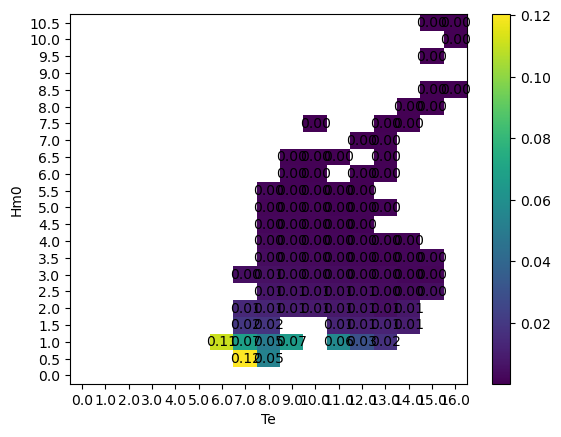

In [16]:
# Plot the capture length mean matrix
ax = wave.graphics.plot_matrix(LM_mean)

The plotting function only requires the matrix as input, but the function can also take several other arguments.
The list of optional arguments is: `xlabel, ylabel, zlabel, show_values, and ax`. The following uses these optional arguments.  The matplotlib package is imported to define an axis with a larger figure size.

<Axes: xlabel='Te (s)', ylabel='Hm0 (m)'>

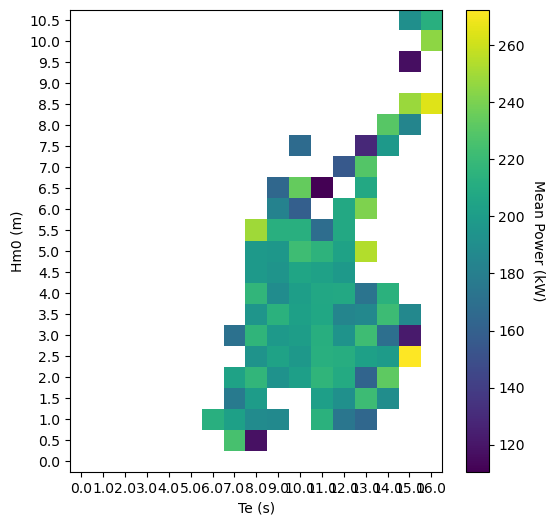

In [17]:
# Customize the matrix plot
import matplotlib.pylab as plt

plt.figure(figsize=(6, 6))
ax = plt.gca()
wave.graphics.plot_matrix(
    PM_mean,
    xlabel="Te (s)",
    ylabel="Hm0 (m)",
    zlabel="Mean Power (kW)",
    show_values=False,
    ax=ax,
)